In [128]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data_to_load)
ride_df=pd.read_csv(ride_data_to_load) 

# Combine the data into a single dataset

combined_df = pd.merge(city_df, ride_df, on="city")

# Display the data table for preview

combined_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [24]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [129]:
# Obtain the x and y coordinates for urban 

urban_city = combined_df.loc[(combined_df["type"] == "Urban")]

# Average Fare, Total Rides and Total Drivers per urban city

avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()



In [130]:
# Obtain the x and y coordinates for suburban

suburban_city = combined_df.loc[(combined_df["type"] == "Suburban")]

# Average Fare, Total Rides and Total Drivers per suburban city

avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()

In [131]:
# Obtain the x and y coordinates for rural

rural_city = combined_df.loc[(combined_df["type"] == "Rural")]

# Average Fare, Total Rides and Total Drivers per rural city

avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()

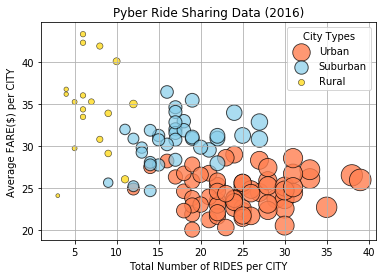

In [132]:
# Create scatter plots for Urban, Suburban and Rural cities

plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*12,
            marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.8, label="Urban", linewidths = .8)

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 0.7, label="Suburban",linewidths = 1)

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*5,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.7, label="Rural", linewidths = .6)

# Chart title, labels, and legend

plt.title("Pyber Ride Sharing Data (2016)")

plt.xlabel("Total Number of RIDES per CITY")

plt.ylabel("Average FARE($) per CITY")

plt.grid()

plt.legend(title = 'City Types', loc="best")

plt.savefig("Pyber Bubbleplot.png")

plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [133]:
# Calculate Total Fares by City Type
total_fares = combined_df.groupby(['type'])['fare'].sum()
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

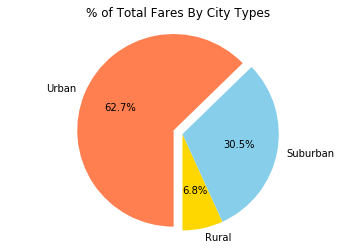

In [134]:
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]

# Pie chart settings
colors = ["gold","skyblue","coral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=False, startangle=270)
plt.axis("equal")
plt.savefig("Pyber Pie Chart Total Fares by City Types.png")
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [135]:
# Calculate Total Rides by City Type
total_rides = combined_df.groupby(['type'])['ride_id'].count()
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

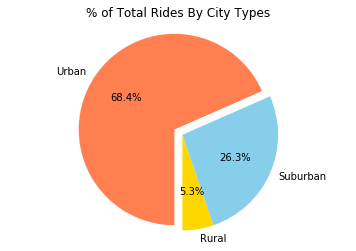

In [136]:
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]

# Pie chart settings
colors = ["gold","skyblue","coral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=270)
plt.axis("equal")
plt.savefig("Pyber Pie Chart Total Rides By City Types.png")
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [137]:
# Total drivers for all cities combined
total_drivers = city_df["driver_count"].sum()

group_city_type = city_df.groupby("type")
total_drivers_type = group_city_type["driver_count"].sum()

# % total drivers for each city type
percent_drivers_type = [(x/total_drivers)*100 for x in total_drivers_type]
percent_drivers_type

[2.6236125126135215, 16.481668348469558, 80.89471913891691]

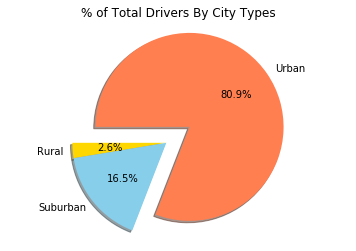

In [138]:
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]

# Pie chart settings
colors = ["gold","skyblue","coral"]
explode = (0, 0, 0.3)
plt.title("% of Total Drivers By City Types")
plt.pie(percent_drivers_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.savefig("Pyber Pie Chart Total Drivers By City Types.png")
plt.show()

In [ ]:
#three observable trends based on the data
#1-in areas where there are fewer rides, the higher the fare per ride such as in rural cities and vice versa.
#2-highest number of riders and drivers are in urban cities.
#3-80% of all drivers work the urban cities even though the fares are lower per rider